# 1. Exploratory Data Analysis

In [1]:
# Importing the the libraries we need for EDA
import pandas as pd
import numpy as np
import os

In [2]:
# Loading our train and test datasets into pandas dataframe
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# Some handy functions for getting the gist of the dataset
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Creating a coloumn 'Survived' and assigning it some random value
test_df['Survived'] = -888

In [5]:
# Now we can see that the new column has been added
test_df.info()
test_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.0
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,-888.0
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.0
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,-888.0
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,-888.0
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,-888.0
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,-888.0
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,-888.0


In [6]:
# Concatenating the train and test data, axis=0 means that we add concatenating them in top to bottom fashion
df = pd.concat([train_df, test_df], axis=0) 

In [7]:
# Experimenting with indexing functions
df.loc[df['Age'] < 15, :]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
7,2.00,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909
9,14.00,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736
10,4.00,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,11,3,female,1,1,PP 9549
14,14.00,NaN,S,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,15,3,female,0,0,350406
16,2.00,NaN,Q,29.1250,"Rice, Master. Eugene",1,17,3,male,4,0,382652
24,8.00,NaN,S,21.0750,"Palsson, Miss. Torborg Danira",1,25,3,female,3,0,349909
39,14.00,NaN,C,11.2417,"Nicola-Yarred, Miss. Jamila",0,40,3,female,1,1,2651
43,3.00,NaN,C,41.5792,"Laroche, Miss. Simonne Marie Anne Andree",2,44,2,female,1,1,SC/Paris 2123
50,7.00,NaN,S,39.6875,"Panula, Master. Juha Niilo",1,51,3,male,4,0,3101295
58,5.00,NaN,S,27.7500,"West, Miss. Constance Mirium",2,59,2,female,1,1,C.A. 34651


In [8]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [9]:
# Numerical features
# Centrality measures
print(f"Mean of fare: {df.Fare.mean()}")
print(f"Median of fare: {df.Fare.median()}")

Mean of fare: 33.2954792813456
Median of fare: 14.4542


In [10]:
print(f"Range of fare: {df.Fare.max() - df['Fare'].min()}")
print(f"25 percentile of fare: {df.Fare.quantile(.25)}") # Percentiles can be broken into 4 parts - quartiles
print(f"50 fare: {df.Fare.quantile(.5)}")
print(f"Variance of fare: {df.Fare.var()}")
print(f"Standard deviation of fare: {df.Fare.std()}")

Range of fare: 512.3292
25 percentile of fare: 7.8958
50 fare: 14.4542
Variance of fare: 2678.959737892894
Standard deviation of fare: 51.75866823917414


In [11]:
%matplotlib inline

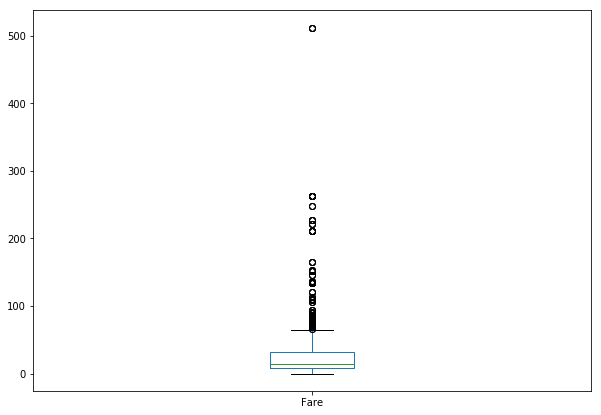

In [12]:
# box-whisker plot
df.Fare.plot(kind='box', figsize=(10,7));

In [13]:
# We can use decsribe(include='all') to get insights on categorical columns as well
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


In [14]:
# Categorical count
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [15]:
# Proportions
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [16]:
df[df.Survived != -888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

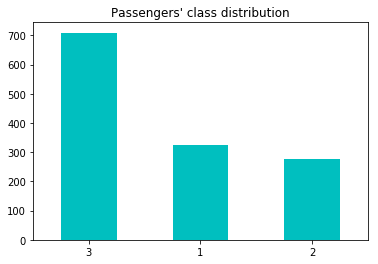

In [18]:
df.Pclass.value_counts().plot(kind='bar', rot=0, title='Passengers\' class distribution', color='c');

## Distributions

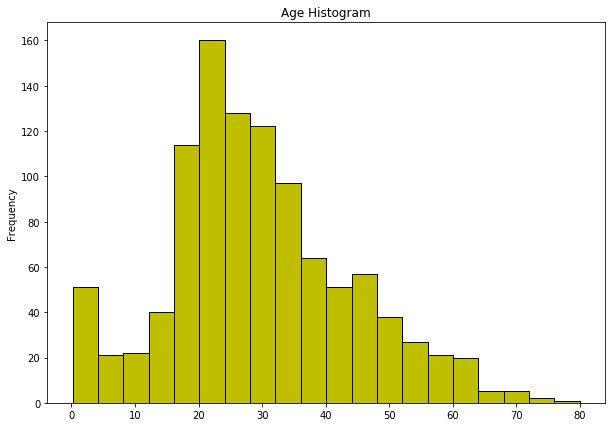

In [19]:
# histogram
df.Age.plot(kind='hist', title='Age Histogram', color='y', edgecolor='black', bins=20, figsize=(10,7));

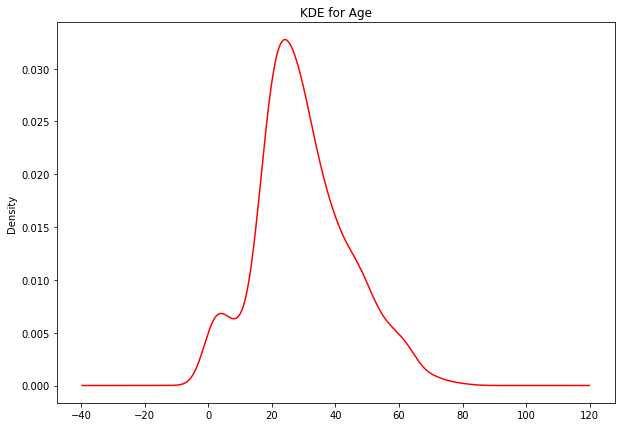

In [20]:
# Kernel Density Estimation
df.Age.plot(kind='kde', title='KDE for Age', color='r', figsize=(10,7));

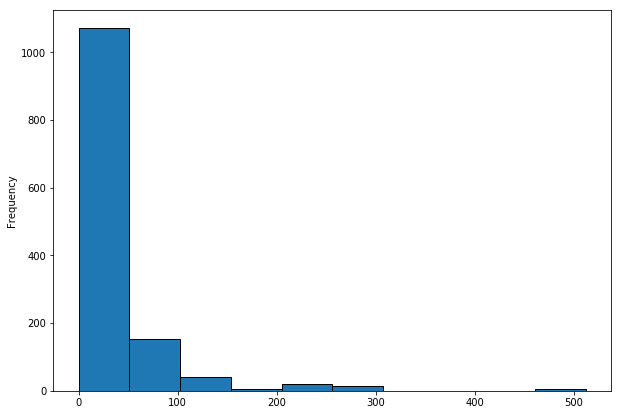

In [21]:
df.Fare.plot(kind='hist', edgecolor='black', figsize=(10,7));

In [22]:
print(f"Skewness for Age: {df.Age.skew()}")
print(f"Skewness for Fare: {df.Fare.skew()}")

Skewness for Age: 0.40767455974362266
Skewness for Fare: 4.367709134122922


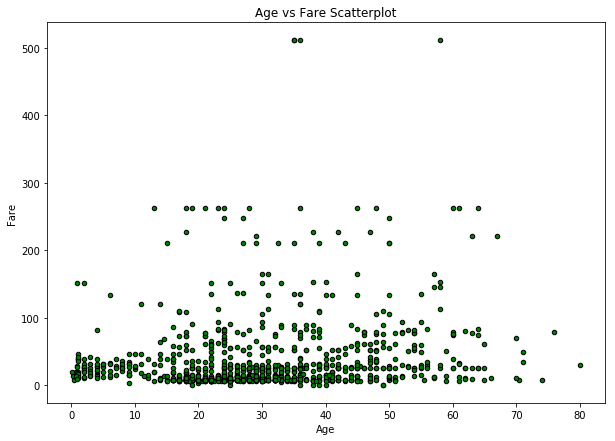

In [23]:
# Scatterplot
df.plot.scatter(x='Age', y='Fare', color='green', edgecolor='black', title='Age vs Fare Scatterplot', figsize=(10,7));

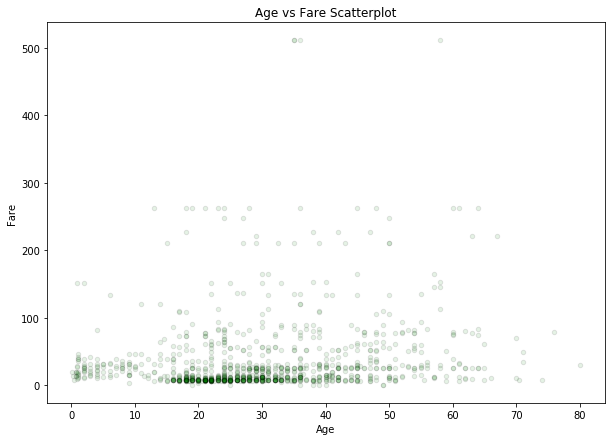

In [24]:
df.plot.scatter(x='Age', y='Fare', color='green', edgecolor='black', title='Age vs Fare Scatterplot', alpha=0.1, figsize=(10,7));

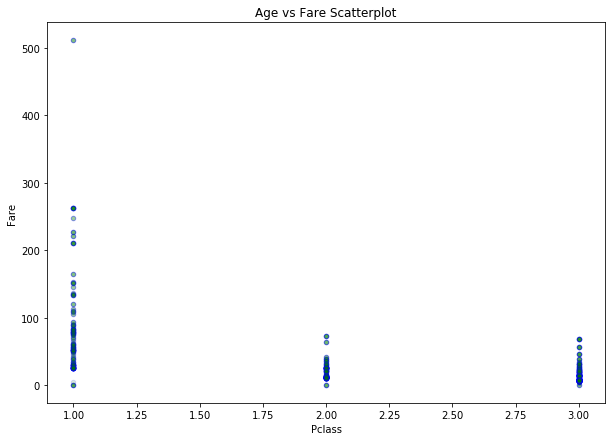

In [25]:
df.plot.scatter(x='Pclass', y='Fare', color='green', edgecolor='b', title='Age vs Fare Scatterplot', alpha=.15, figsize=(10,7));

In [26]:
# Grouping and aggregations
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [27]:
df.groupby('Sex')['Fare', 'Age'].median()

,Fare,Age
Sex,,
female,23.0000,27.0
male,11.8875,28.0


In [28]:
df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [29]:
# Some complicated aggregations using dictionary of aggregations

aggregations = {
    'Fare' : {
        'mean_Fare' : 'mean',
        'median_Fare' : 'median',
        'max_Fare' : max,
        'min_Fare' : min
    },
    
    'Age' : {
        'mean_Age' : 'mean',
        'median_Age' : 'median',
        'max_Age' : 'max',
        'range_Age' : lambda x: x.max() - x.min()
    }
}

In [30]:
df.groupby('Pclass').agg(aggregations)

C:\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age             \
        mean_Fare median_Fare  max_Fare min_Fare   mean_Age median_Age   
Pclass                                                                   
1       87.508992     60.0000  512.3292      0.0  39.159930       39.0   
2       21.179196     15.0458   73.5000      0.0  29.506705       29.0   
3       13.302889      8.0500   69.5500      0.0  24.816367       24.0   

                          
       max_Age range_Age  
Pclass                    
1         80.0     79.08  
2         70.0     69.33  
3         74.0     73.83

In [31]:
df.groupby(['Pclass', 'Embarked']).Fare.mean()

Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.148094
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

In [32]:
# Crosstabs
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


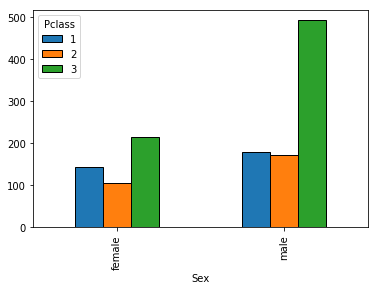

In [33]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar', edgecolor='black');

In [34]:
# Pivot table
df.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [35]:
# Same thing as above using groupby
df.groupby(['Sex', 'Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


#### End of EDA

# 2. Data Munging and Feature Engineering

In [36]:
# Missing values in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 172.9+ KB


### Dealing with 'Embarked'

In [37]:
# Dealing with the missing values in 'Embarked' feature first
df[df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1,113572


In [38]:
# Looking at the mode of 'Embarked' values
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [39]:
pd.crosstab(df[df.Survived != -888].Embarked, df[df.Survived != -888].Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [40]:
# 'S' has the most survivors
# df.Embarked.fillna('S', inplace=True)

In [41]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [42]:
# Replacing missing 'Embarked' values with 'C' since the median fare is close the fares of the two passengers with empty Embarked point (80)
df.Embarked.fillna('C', inplace=True)

In [43]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 172.9+ KB


### Dealing with 'Fare'

In [45]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,-888,3701


In [46]:
median_fare = df.loc[(df.Pclass==3) & (df.Embarked=='S'), 'Fare'].median()
df.Fare.fillna(median_fare, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 172.9+ KB


### Dealing with 'Age'

In [48]:
pd.options.display.max_rows = 15
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1,244373
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1,2649
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0,2631
28,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1,330959
29,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,30,3,male,0,0,349216
31,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,1,1,PC 17569
...,...,...,...,...,...,...,...,...,...,...,...,...
382,NaN,NaN,S,14.5000,"Risien, Mrs. Samuel (Emma)",0,1274,3,female,0,-888,364498
384,NaN,NaN,S,12.8750,"Wheeler, Mr. Edwin Frederick""""",0,1276,2,male,0,-888,SC/PARIS 2159


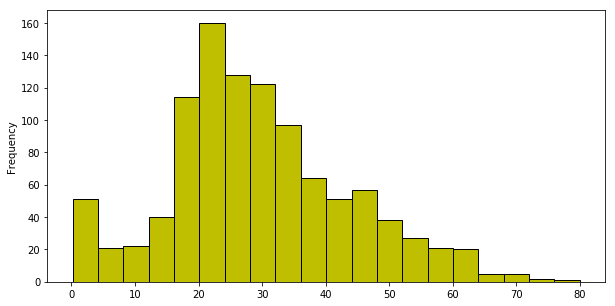

In [49]:
# Inspecting the distribution of age in the dataset
df.Age.plot(kind='hist', color='y', edgecolor='black', bins=20, figsize=(10,5));

In [50]:
df.Age.mean()

29.881137667304014

In [51]:
# Mean is not a very good measure since it is easily affected by extreme values, and we have some extreme values here
# Checking median values and percentiles
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


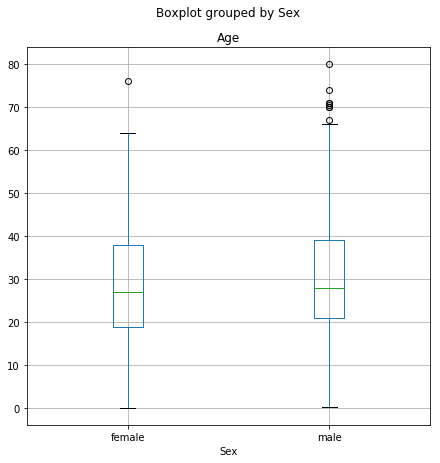

In [52]:
df[df.Age.notnull()].boxplot('Age', 'Sex', figsize=(7,7));

In [53]:
# age_sex_median = df.groupby('Sex').Age.transform('median')
# df.Age.fillna('age_sex_median', inplace=True)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


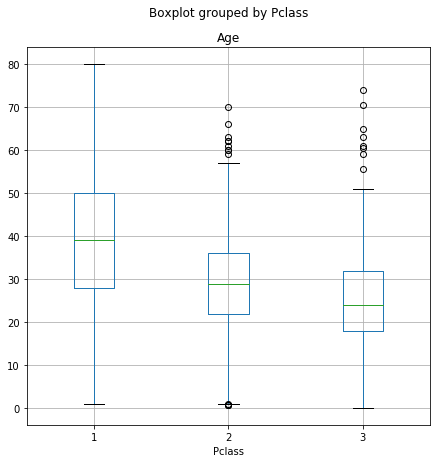

In [54]:
# Checking median age according to Pclass
df[df.Age.notnull()].boxplot('Age', 'Pclass', figsize=(7,7));

In [55]:
# pclass_age_median = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(pclass_age_median), inplace=True

In [56]:
# Trying to use name title as a measure for filling missing age values
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
                             ...                        
411      Minahan, Mrs. William Edward (Lillian E Thorpe)
412                       Henriksson, Miss. Jenny Lovisa
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [57]:
# Function to get the title for a name
def GetTitle(name):
        first_name_with_title = name.split(',')[1]
        title = first_name_with_title.split('.')[0]
        title = title.strip().lower()
        return title

In [58]:
# Using map to use GetTitle function on all names values
df.Name.map(lambda x: GetTitle(x))

0          mr
1         mrs
2        miss
3         mrs
4          mr
5          mr
6          mr
        ...  
411       mrs
412      miss
413        mr
414      dona
415        mr
416        mr
417    master
Name: Name, Length: 1309, dtype: object

In [59]:
df.Name.map(lambda x: GetTitle(x)).value_counts()

mr              757
miss            260
mrs             197
master           61
rev               8
dr                8
col               4
               ... 
jonkheer          1
lady              1
dona              1
capt              1
the countess      1
mme               1
don               1
Name: Name, Length: 18, dtype: int64

In [60]:
df.Name.map(lambda x: GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [61]:
# Modifying the GetTitle function to map titles as we need
def GetTitle(name):
    title_group = {'mr' : 'Mr',
                   'mrs' : 'Mrs',
                   'miss' : 'Miss',
                   'master' : 'Master',
                   'don' : 'Sir',
                   'rev' : 'Sir',
                   'dr' : 'Officer',
                   'mme' : 'Mrs',
                   'ms' : 'Mrs',
                   'major' : 'Officer',
                   'lady' : 'Lady',
                   'sir' : 'Sir',
                   'mlle' : 'Miss',
                   'col' : 'Officer',
                   'capt' : 'Officer',
                   'the countess' : 'Lady',
                   'jonkheer' : 'Sir',
                   'dona' : 'Lady'
                  }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [62]:
# Creating new feature called 'Title'
df['Title'] = df.Name.map(lambda x : GetTitle(x))

In [63]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


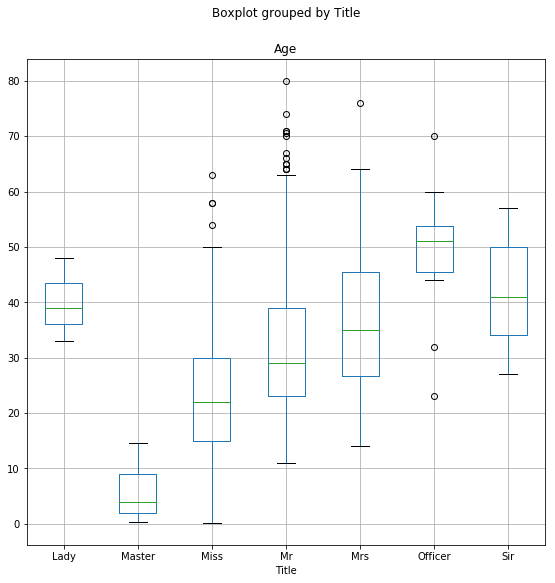

In [64]:
df[df.Age.notnull()].boxplot('Age', 'Title', figsize=(9,9));

In [65]:
# Replacing missing age value with median ages according to titles
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median, inplace=True)

In [66]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 183.2+ KB


## Treating Outliers

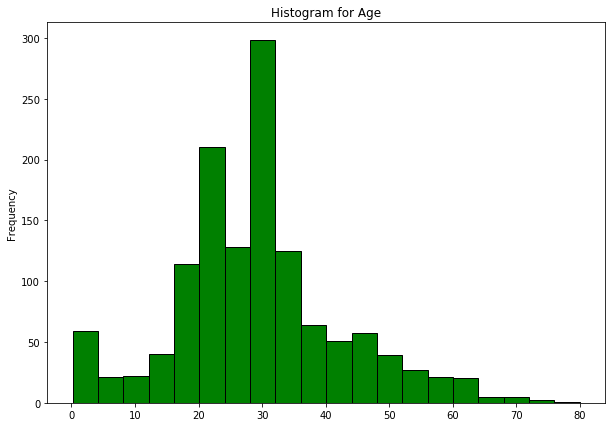

In [67]:
# Age
df.Age.plot(kind='hist', title='Histogram for Age', bins=20, color='g', edgecolor='black', figsize=(10,7));

In [68]:
df.loc[df.Age > 70]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
96,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,97,1,male,0,0,PC 17754,Mr
116,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,117,3,male,0,0,370369,Mr
493,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,494,1,male,0,0,PC 17609,Mr
630,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,631,1,male,0,1,27042,Mr
851,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,852,3,male,0,0,347060,Mr
96,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,988,1,female,1,-888,19877,Mrs


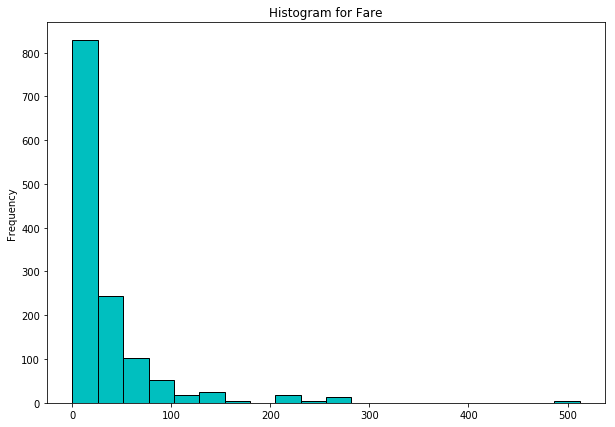

In [69]:
# Fare
df.Fare.plot(kind='hist', title='Histogram for Fare', bins=20, color='c', edgecolor='black', figsize=(10,7));

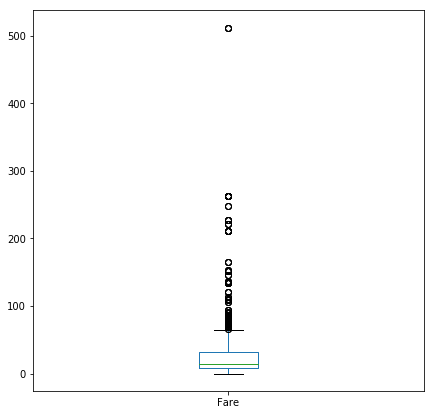

In [70]:
df.Fare.plot(kind='box', figsize=(7,7));

In [71]:
# Outlier values for Fare
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1,PC 17755,Miss
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1,PC 17755,Mr
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1,PC 17755,Mr
343,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,-888,PC 17755,Mrs


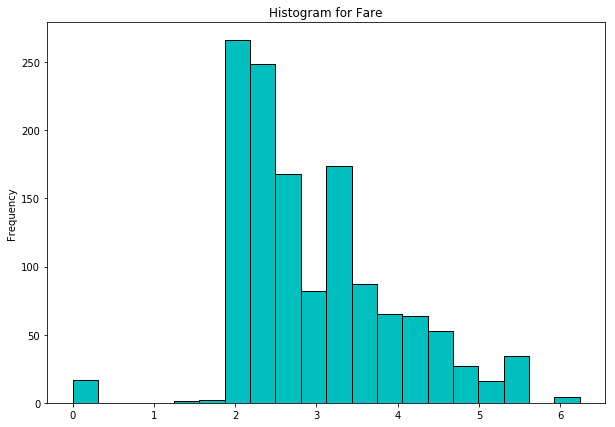

In [72]:
log_Fare = np.log(df.Fare + 1.0)
log_Fare.plot(kind='hist', title='Histogram for Fare', bins=20, color='c', edgecolor='black', figsize=(10,7));

In [73]:
# Binning
# qcut function performs quantile based binning
pd.qcut(df['Fare'], 4)

0        (-0.001, 7.896]
1      (31.275, 512.329]
2        (7.896, 14.454]
3      (31.275, 512.329]
4        (7.896, 14.454]
5        (7.896, 14.454]
6      (31.275, 512.329]
             ...        
411    (31.275, 512.329]
412      (-0.001, 7.896]
413      (7.896, 14.454]
414    (31.275, 512.329]
415      (-0.001, 7.896]
416      (7.896, 14.454]
417     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [74]:
# Discretizing the bins into 4 categories
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

0       very_low
1      very_high
2            low
3      very_high
4            low
5            low
6      very_high
         ...    
411    very_high
412     very_low
413          low
414    very_high
415     very_low
416          low
417         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

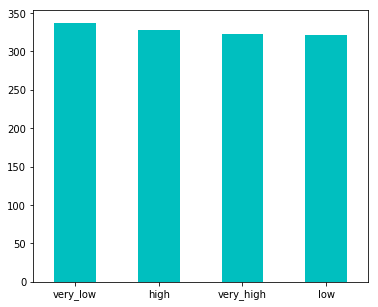

In [75]:
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']).value_counts().plot(kind='bar', color='c', rot=0, figsize=(6,5));

In [76]:
# Creating a new feature for storing these fare bins
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Title          1309 non-null object
Fare_Bin       1309 non-null category
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 184.6+ KB


In [78]:
df.Fare_Bin.value_counts()

very_low     337
high         328
very_high    323
low          321
Name: Fare_Bin, dtype: int64

## Feature Engineering - tranformation, creation, selection
#### Using domain knowledge and technical expertise

### AgeState (child/adult)

In [79]:
# Creating feature 'AgeState' for child/adult
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult', 'Child')

In [80]:
df.AgeState.value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [81]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


### FamilySize

In [82]:
df['FamilySize'] = df.Parch + df.SibSp + 1

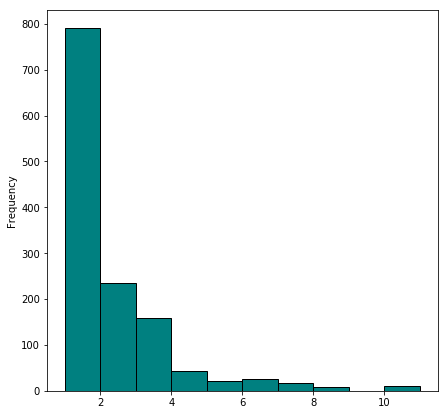

In [83]:
df.FamilySize.plot(kind='hist', color='teal', edgecolor='black', figsize=(7,7));

In [84]:
# We can see that there were a few large size families
df.loc[df.FamilySize == df.FamilySize.max(), ['Name', 'Survived', 'FamilySize', 'Ticket']]

,Name,Survived,FamilySize,Ticket
159,"Sage, Master. Thomas Henry",0,11,CA. 2343
180,"Sage, Miss. Constance Gladys",0,11,CA. 2343
201,"Sage, Mr. Frederick",0,11,CA. 2343
324,"Sage, Mr. George John Jr",0,11,CA. 2343
792,"Sage, Miss. Stella Anna",0,11,CA. 2343
846,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
863,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
188,"Sage, Miss. Ada",-888,11,CA. 2343
342,"Sage, Mr. John George",-888,11,CA. 2343
360,"Sage, Master. William Henry",-888,11,CA. 2343


In [85]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [86]:
# Here we can see that large families had low survival rate, while small families had a higher survival rate

### Mother and child : IsMother

In [87]:
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Title == 'Mrs') & (df.Age > 18)), 1, 0)

In [88]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


In [89]:
# Here, motherhood might be one deciding factor for survival as more mothers survived

### Deck

In [90]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
5       NaN
6       E46
       ... 
411     C78
412     NaN
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

In [91]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [92]:
df[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
339,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,340,1,male,0,0,113784,Mr,very_high,Adult,1,0


In [93]:
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [94]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'C128', 'D37', 'B35',
       'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111', 'C92',
       'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20', 'B79',
       'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86', 'C70',
       'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50',
       'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90

In [95]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')

df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [96]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [97]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


## Categorical feature encoding

In [98]:
# Sex
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [99]:
# One-hot encoding
df = pd.get_dummies(df, columns=['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 40 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
PassengerId           1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclas

### Rearranging and reorganizing the dataframe

In [101]:
# Drop columns
df.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1, inplace=True)

In [102]:
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 34 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
PassengerId           1309 non-null int64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr

## Saving the final clean data 

In [116]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

In [120]:
# Train data
df.loc[df.Survived != -888].to_csv('train_processed.csv', index=False)
# Test data
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -888, columns].to_csv('test_processed.csv', index=False)

## Building the data preprocessing script

In [128]:
get_processed_data_script_file = os.path.join(os.path.pardir, 'Titanic-dataset-experimentation', 'Scripts', 'get_processed_data.py')

In [129]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd
import os

def read_data():
    train_df = pd.read_csv('train.csv', index_col='PassengerId')
    test_df = pd.read_csv('test.csv', index_col='PassengerId')
    test_df['Survived'] = -888
    df = pd.concat((train_df, test_df), axis=0)
    return df

def process_data(df):
    # using method chaining
    return(df
           # Creating title attribute and adding it
           .assign(Title = lambda x : x.Name.map(GetTitle))
           # filling missing values
           .pipe(fill_missing_values)
           # create fare bin
           .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low', 'low', 'high'm 'very_high']))
           # creating age state
           .assign(AgeState = lambda x: np.where(x.Age >= 18, 'Adult', 'Child'))
           .assign(FamilySize = lambda x: x.Parch + x.SibSp + 1)
           .assign(IsMother = lambda x: np.where(((x.Sex == 'female') & (x.Parch > 0) & (x.Title == 'Mrs') & (x.Age > 18)), 1, 0))
           # deck feature
           .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.NaN, x.Cabin))
           .assign(Deck = lambda x: x.Cabin.map(get_deck))
           # feature encoding
           .assign(IsMale = lambda x: np.where(x.Sex == 'male', 1, 0))
           .pipe(pd.get_dummies, columns=['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])
           .drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1)
           .pipe(reorder_columns)
          )


def GetTitle(name):
    title_group = {'mr' : 'Mr',
                   'mrs' : 'Mrs',
                   'miss' : 'Miss',
                   'master' : 'Master',
                   'don' : 'Sir',
                   'rev' : 'Sir',
                   'dr' : 'Officer',
                   'mme' : 'Mrs',
                   'ms' : 'Mrs',
                   'major' : 'Officer',
                   'lady' : 'Lady',
                   'sir' : 'Sir',
                   'mlle' : 'Miss',
                   'col' : 'Officer',
                   'capt' : 'Officer',
                   'the countess' : 'Lady',
                   'jonkheer' : 'Sir',
                   'dona' : 'Lady'
                  }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]


def fill_missing_values(df):
    # embarked
    df.Embarked.fillna('C', inplace=True)
    # fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked = 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    # age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median, inplace=True)
    return df


def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df


def write_data(df):
    # Train data
    df.loc[df.Survived != -888].to_csv('train_processed.csv', index=False)
    # Test data
    columns = [column for column in df.columns if column != 'Survived']
    df.loc[df.Survived == -888, columns].to_csv('test_processed.csv', index=False)
    
    
if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)

Writing ..\Titanic-dataset-experimentation\Scripts\get_processed_data.py


## Matplotlib visualizations

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

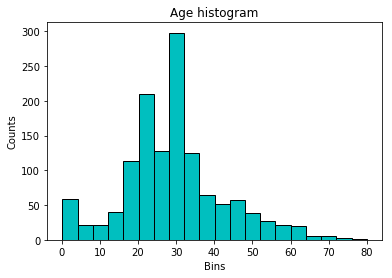

In [144]:
f, ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c', edgecolor='black')
ax.set_title('Age histogram')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

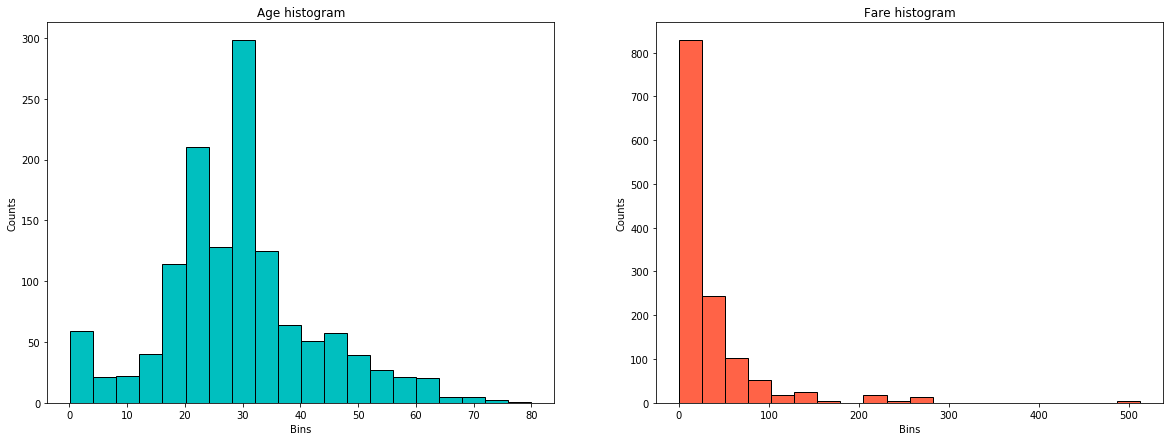

In [147]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,7))

ax1.hist(df.Age, bins=20, color='c', edgecolor='black')
ax1.set_title('Age histogram')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Fare, bins=20, color='tomato', edgecolor='black')
ax2.set_title('Fare histogram')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()

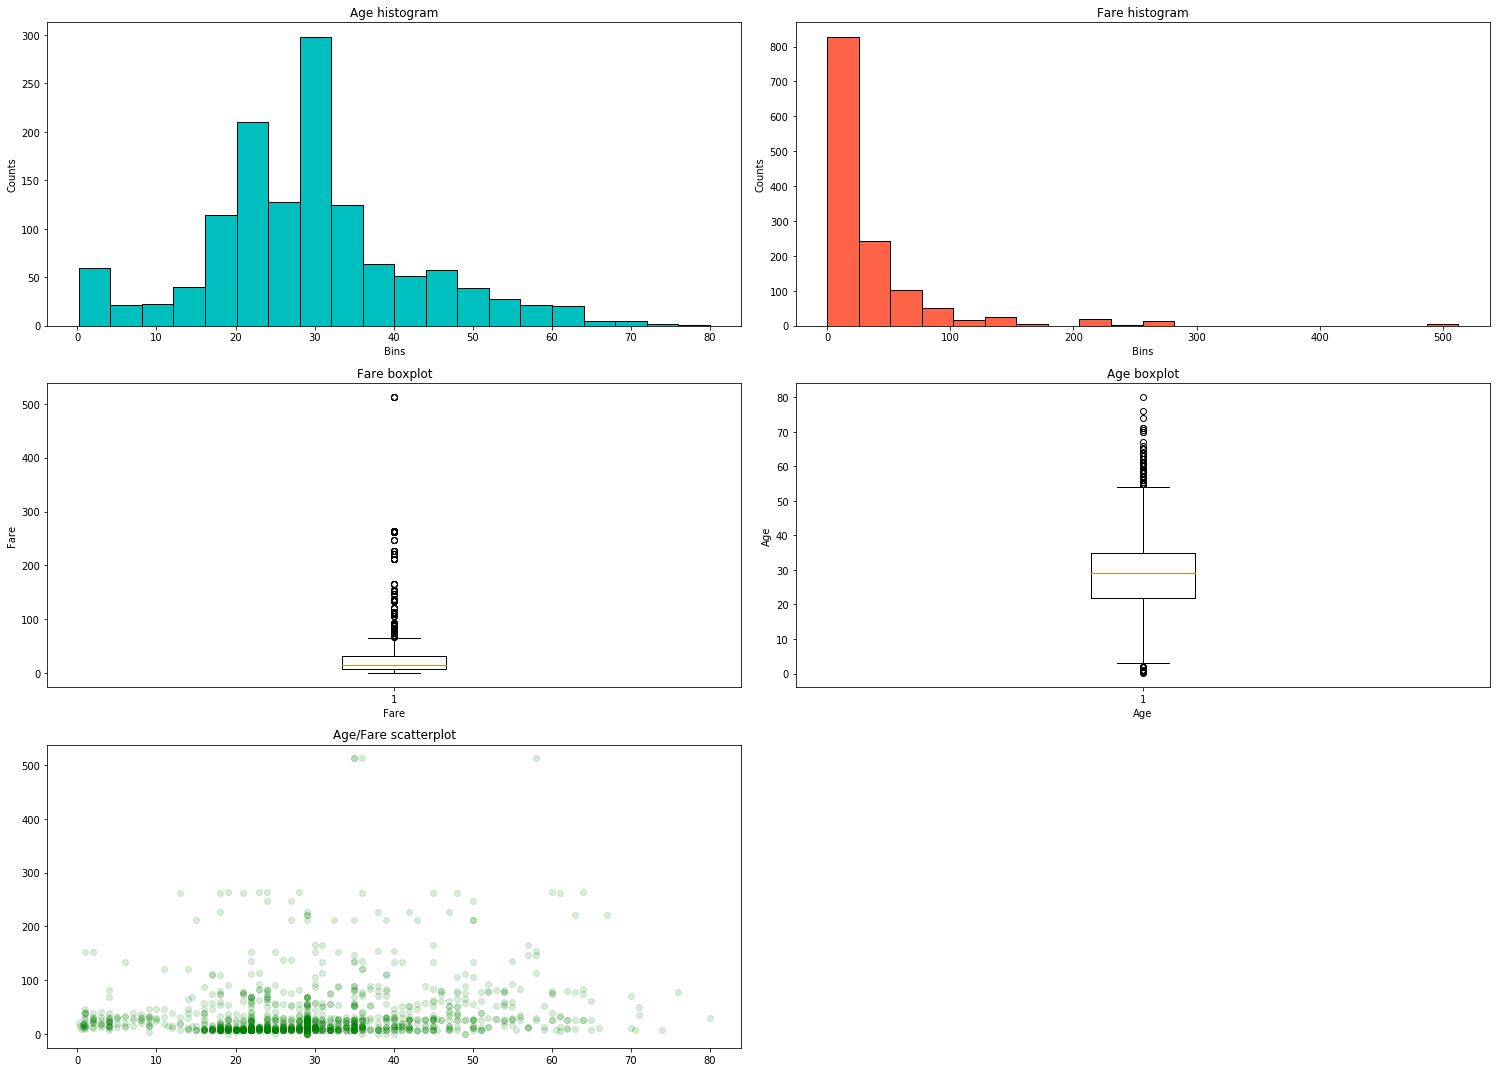

In [151]:
f, ax_arr = plt.subplots(3, 2, figsize=(21,15))

ax_arr[0,0].hist(df.Age, bins=20, color='c', edgecolor='black')
ax_arr[0,0].set_title('Age histogram')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

ax_arr[0,1].hist(df.Fare, bins=20, color='tomato', edgecolor='black')
ax_arr[0,1].set_title('Fare histogram')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Fare boxplot')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Age boxplot')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

ax_arr[2,0].scatter(df.Age, df.Fare, color='g', alpha=0.15)
ax_arr[2,0].set_title('Age/Fare scatterplot')

ax_arr[2,1].axis('off')
plt.tight_layout()

plt.show()